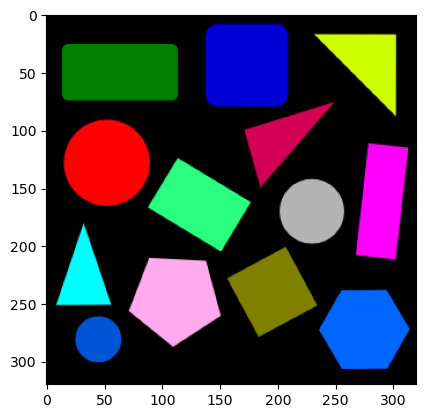

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./shapes.png')
plt.imshow(img)

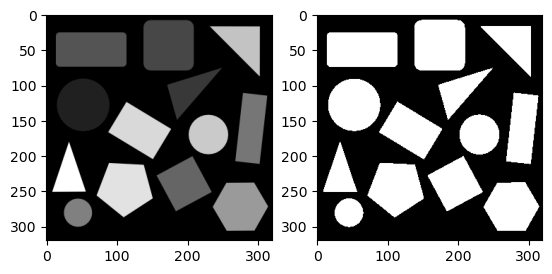

In [2]:
# 이미지를 그레이스케일로 변환한 후 임계 처리

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
#gray = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)

ret, thresh = cv.threshold(gray, 20, 255, cv.THRESH_BINARY)

plt.subplot(121); plt.imshow(gray, cmap='gray')
plt.subplot(122); plt.imshow(thresh, cmap='gray')


In [3]:
# 외곽선 검출
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# 레이블 그리기 함수
def setLabel(src, points, label):
    c = tuple(np.random.choice(range(256), size=3))
    color = (int(c[0]), int(c[1]), int(c[2]))
    
    x,y,w,h = cv.boundingRect(points)
    cv.rectangle(src,(x,y),(x+w,y+h),color,2)
    cv.putText(src, label, (x,y), cv.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2, cv.LINE_AA)

    return src

contours

(array([[[ 41, 261]],
 
        [[ 40, 262]],
 
        [[ 39, 262]],
 
        [[ 38, 262]],
 
        [[ 37, 263]],
 
        [[ 36, 263]],
 
        [[ 35, 264]],
 
        [[ 34, 264]],
 
        [[ 33, 265]],
 
        [[ 32, 266]],
 
        [[ 31, 267]],
 
        [[ 30, 268]],
 
        [[ 29, 269]],
 
        [[ 28, 270]],
 
        [[ 28, 271]],
 
        [[ 27, 272]],
 
        [[ 27, 273]],
 
        [[ 26, 274]],
 
        [[ 26, 275]],
 
        [[ 26, 276]],
 
        [[ 25, 277]],
 
        [[ 25, 278]],
 
        [[ 25, 279]],
 
        [[ 25, 280]],
 
        [[ 25, 281]],
 
        [[ 25, 282]],
 
        [[ 25, 283]],
 
        [[ 25, 284]],
 
        [[ 25, 285]],
 
        [[ 26, 286]],
 
        [[ 26, 287]],
 
        [[ 26, 288]],
 
        [[ 27, 289]],
 
        [[ 27, 290]],
 
        [[ 28, 291]],
 
        [[ 28, 292]],
 
        [[ 29, 293]],
 
        [[ 30, 294]],
 
        [[ 31, 295]],
 
        [[ 32, 296]],
 
        [[ 33, 297]],
 
        [[ 34, 2

In [4]:
# 외곽선 정보를 순회하면서 해당 객체의 유형 검사

for cnt in contours:
    
    if cv.contourArea(cnt) < 10:
        continue
    
    # 근사값 계산을 통해 꼭지점의 개수를 구함
    epsilon = 0.02 * cv.arcLength(cnt,True)
    approx = cv.approxPolyDP(cnt,epsilon,True)    

    if approx.shape[0] == 3:
        img = setLabel(img, approx, "TRI")
    elif approx.shape[0] == 4:
        img = setLabel(img, approx, "RECT")
    elif approx.shape[0] > 6:
        len = cv.arcLength(approx, True)
        area = cv.contourArea(cnt)
        ratio = 4 * np.pi * area / (len * len)
        
        if ratio > 0.8:
            print(approx.shape[0])
            setLabel(img, approx, "CIR")
        

8
8
8


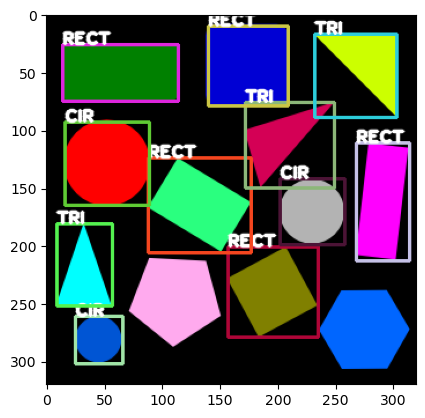

In [5]:
plt.imshow(img)